In [30]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [31]:
os.chdir(os.path.join(os.getcwd(), '../data_final'))
files = os.listdir()


In [32]:
lang_str = 'C|C++|C#|PYTHON|JAVA|JAVASCRIPT|PHP|HTML|SQL|CSS|R|RUBY|PERL|SCALA|SWIFT|GO|DELPHI|TYPESCRIPT|MYSQL|Objective-c|VBA|jQuery|ASP.NET'
language = lang_str.split('|')
all_result = {key.upper():0 for key in language}
all_result

{'ASP.NET': 0,
 'C': 0,
 'C#': 0,
 'C++': 0,
 'CSS': 0,
 'DELPHI': 0,
 'GO': 0,
 'HTML': 0,
 'JAVA': 0,
 'JAVASCRIPT': 0,
 'JQUERY': 0,
 'MYSQL': 0,
 'OBJECTIVE-C': 0,
 'PERL': 0,
 'PHP': 0,
 'PYTHON': 0,
 'R': 0,
 'RUBY': 0,
 'SCALA': 0,
 'SQL': 0,
 'SWIFT': 0,
 'TYPESCRIPT': 0,
 'VBA': 0}

In [33]:
files

['1111.csv',
 '518.csv',
 'linkedin.csv',
 'pttTech.csv',
 '123.csv',
 'pttSoft.csv']

In [34]:
asp_regex = 'ASP.NET|.net|ASP'

for file in files:
    print(file)
    with open(file, 'r', encoding='utf-8') as f:
        pairs = f.read().split('\n')
        pairs = [pair for pair in pairs if len(pair)]
        lan = [pair.split(',')[0].upper() for pair in pairs]
        counts = [pair.split(',')[1] for pair in pairs]
        result = dict(zip(lan, counts))  # {k:v for (k,v) in zip(lan, couonts)}
        for key in result.keys():
            if key in all_result.keys():
                all_result[key] += int(result[key]) 
            if re.match(asp_regex, key):
                all_result['ASP.NET'] += 1

1111.csv
518.csv
linkedin.csv
pttTech.csv
123.csv
pttSoft.csv


In [35]:
sorted(all_result.items(), key=lambda x:x[1], reverse=True)


[('C#', 1874),
 ('SQL', 1559),
 ('C++', 1374),
 ('JAVA', 1268),
 ('C', 989),
 ('JAVASCRIPT', 986),
 ('PHP', 972),
 ('MYSQL', 799),
 ('HTML', 640),
 ('JQUERY', 595),
 ('PYTHON', 390),
 ('R', 261),
 ('CSS', 251),
 ('RUBY', 223),
 ('OBJECTIVE-C', 126),
 ('PERL', 91),
 ('SWIFT', 52),
 ('DELPHI', 33),
 ('VBA', 26),
 ('ASP.NET', 15),
 ('GO', 8),
 ('SCALA', 0),
 ('TYPESCRIPT', 0)]

In [36]:
result_list = [(k,v) for (k,v) in all_result.items()]

df = pd.DataFrame(result_list)
df.columns = ['Language', 'Counts']
df = df.set_index(['Language'], drop=True)
# df.index = ['Language']


In [40]:
sort_df = df.sort_values(by="Counts", ascending=False)
sort_df


,Counts
Language,
C#,1874
SQL,1559
C++,1374
JAVA,1268
C,989
JAVASCRIPT,986
PHP,972
MYSQL,799
HTML,640


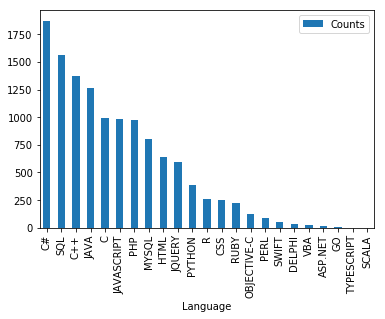

In [39]:
plt.figure(figsize=(100,100))
sort_df.plot(kind='bar')
plt.show()